In [13]:
!pip install numpy matplotlib seaborn pandas scikit-learn

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KernelDensity

In [16]:
data = pd.read_csv('electricity_consumption_data.csv', sep=';', encoding='utf-8')

# 1 Задание

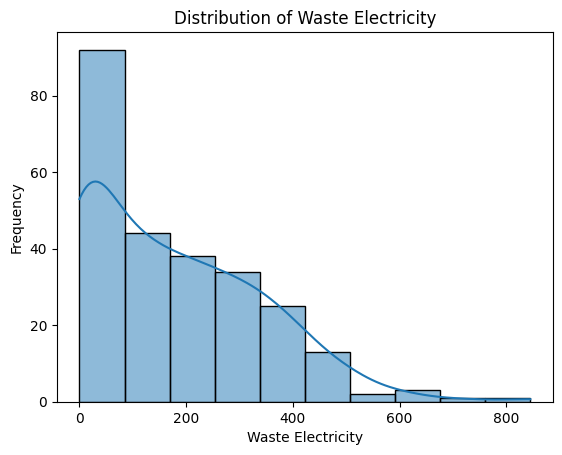

Mean: 178.44
Median: 149.02
Standard Deviation: 163.55


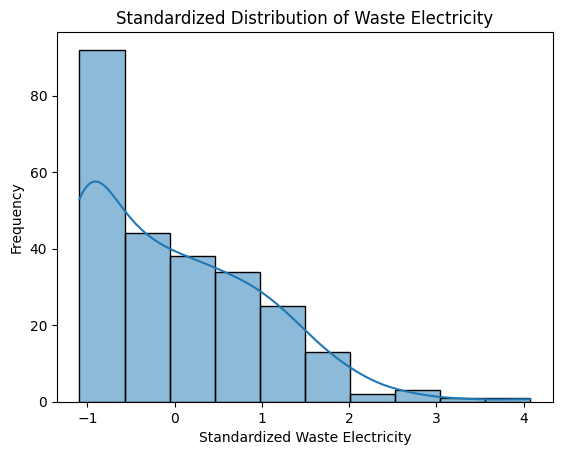

In [17]:
# Построение функции распределения на основе гистограммы распределения
# Используем seaborn.histplot для построения функциии
sns.histplot(data['Waste_electricity'], kde=True)
plt.title('Distribution of Waste Electricity')
plt.xlabel('Waste Electricity')
plt.ylabel('Frequency')
plt.show()

# Выделение основных характеристик распределения
mean = np.mean(data['Waste_electricity']) # Мат ожидание
median = np.median(data['Waste_electricity']) # Медиана
std_dev = np.std(data['Waste_electricity']) # Стандартная ошибка среднего

# Вывод основных характеристик
print(f'Mean: {mean:.2f}')
print(f'Median: {median:.2f}')
print(f'Standard Deviation: {std_dev:.2f}')

# Стандартизация данных, чтобы данные имели среднее 0 и стандартное отклонение 1
scaler = StandardScaler()
data['Waste_electricity_standardized'] = scaler.fit_transform(data[['Waste_electricity']])

# Построение стандартизированной функции распределения
sns.histplot(data['Waste_electricity_standardized'], kde=True)
plt.title('Standardized Distribution of Waste Electricity')
plt.xlabel('Standardized Waste Electricity')
plt.ylabel('Frequency')
plt.show()

# 2 Задание

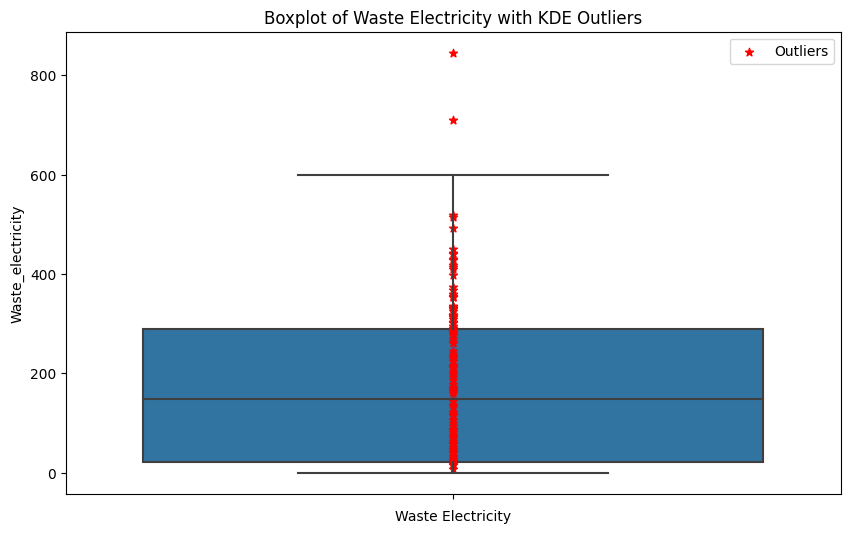

Outliers:
                 Time  Waste_electricity  Waste_electricity_standardized  \
53   01.01.2023 10:25           8.020700                       -1.042035   
56   01.01.2023 10:40          16.148554                       -0.992338   
57   01.01.2023 10:45          18.327981                       -0.979012   
58   01.01.2023 10:50          19.064322                       -0.974509   
67   01.01.2023 11:35          23.914801                       -0.944851   
..                ...                ...                             ...   
240   02.01.2023 2:00         492.255400                        1.918795   
246   02.01.2023 2:30         513.590564                        2.049248   
247   02.01.2023 2:35         517.590564                        2.073706   
251   02.01.2023 2:55         709.455112                        3.246853   
252   02.01.2023 3:00         845.088025                        4.076174   

     Waste_electricity_density  
53                    0.003154  
56         

In [28]:
# Оценка плотности вероятности с использованием KDE
kde = KernelDensity(bandwidth=0.5)
kde.fit(data[['Waste_electricity']])
data['Waste_electricity_density'] = np.exp(kde.score_samples(data[['Waste_electricity']]))

# Построение боксплота для расхода электроэнергии
plt.figure(figsize=(10, 6))
sns.boxplot(y=data['Waste_electricity'], showfliers=False)  # showfliers=False, чтобы не показывать выбросы

# Добавление точек для выбросов
threshold = 0.005
outliers = data[data['Waste_electricity_density'] < threshold]
plt.scatter(np.repeat(0, len(outliers)), outliers['Waste_electricity'], color='r', marker='*', label='Outliers')

# Настройка графика
plt.title('Boxplot of Waste Electricity with KDE Outliers')
plt.xlabel('Waste Electricity')
plt.legend()
plt.show()

# Вывод анализа выбросов
print('Outliers:')
print(outliers)

Настроим порог в 0.005

Заметны несколько кучных выбросов с уровнем около 500 и точечные около 700 и 850

Изменение порога для определения выбросов влияет на количество точек, которые будут считаться выбросами. Более низкий порог приведет к большему количеству точек, считаемых выбросами, и наоборот.

Так при нашем решении у нас основная масса точек лежит между 0 и 350